# Assignment Instructions

Complete the following problems. Then save your notebook and submit it on Gradescope (as an `.ipynb` file). Make sure you run all code cells (including assertion cells) before saving and submitting; i.e., make sure all required outputs are visible in your submission.

Hints:
- The problem parts are meant to build upon each other (i.e., your functions might call or copy code from earlier functions).
- Some functions have comments that describe the general process for my solutions. These comments may help you think about and structure your code solutions. There are, of course, many ways to solve these problems.
- We suggest you add code cells to test your code as you work on it (it is often easier to test code outside of a function). Just delete added cells before submitting.
- Google (especially stack overflow) is your friend for code questions.

# Part 0: Supplementary code

Run the following cell to access supplementary functions that may help you complete this assignment. You can use the test cells below them to experiment and see what the functions do.

In [19]:
import numpy as np

def chebyshev(a, b, n):
    """Returns a Chebyshev point distribution of n points in the domain [a, b].
    
    Parameters
    ----------
    a : float_like
        Lower bound of domain (inclusive)
    b : float_like
        Upper bound of domain (inclusive)
    n : integer
        Number of data points to return
        
    Returns
    -------
    x : list_like
        List or array of data points (in ascending order)

    Examples
    --------
    >>> chebyshev(2, 5, 4)
    array([5.0, 4.25, 2.7500000000000004, 2.0])
    
    """
    
    x = [0.5 * (a + b) + 0.5 * (b - a) * np.cos(j * np.pi / (n - 1)) for j in range(0, n)]
    
    return x

def f_true(x):
    """Returns the value of the true function at x.
    
    Parameters
    ----------
    x : float_like
        Input x value
        
    Returns
    -------
    y : float_like
        Output for f(x)

    Examples
    --------
    >>> f_true(0.5)
    array([2.  , 2.75, 4.25, 5.  ])
    0.07067822452613834
    """
    
    return np.sin(np.cos(3 * x))

In [20]:
"""Check the function"""
# test chebyshev function
a, b, n = 2, 5, 4
x_interpolate = chebyshev(a, b, n)
print('chebyshev: ', x_interpolate)

# test f_true function
x = 0.5
f = f_true(x)
print('f_true: ', f)

chebyshev:  [5.0, 4.25, 2.7500000000000004, 2.0]
f_true:  0.07067822452613834


# Problem 1: Polynomial interpolation using the monomial basis

We discussed in class that when performing polynomial interpolation, a linear system $\boldsymbol{Ac} = \boldsymbol{f}$ arises to solve for coefficients $\boldsymbol{c}$ that express the interpolant in the particular basis used to build $\boldsymbol{A}$.

This problem will have you code a solution for performing polynomial interpolation of the true function $f(x) = \sin(\cos(3x))$ over the interval $[2, 5]$ using the **monomial basis.**

Use the Chebyshev points described in class.

## Part 1a: Monomial basis (concept question)

You will be asked to interpolate $f(x)$ using a polynomial of degree $n$ with a **monomial basis**. Before coding your solution, answer the following concept questions in the next Markdown cell.

1. Write out the set of monomial basis vectors, $\mathcal{B} = \{b_0(x), b_1(x), \dots, b_{n}(x) \}$, for your polynomial approximation function with $n = 3$.
1. Symbolically derive the matrix system $\boldsymbol{Ac} = \boldsymbol{f}$ for using this basis (with $n = 3$). I.e., show the complete matrix equation.

**Tips for writing in Jupyter notebooks:**

Jupyter notebooks allow you to write in Markdown cells (like this one and the next one) and code cells (included later in this file). Markdown is a lightweight markup language that you can use to format text in Jupyter notebooks (and other plaintext text documents). A handy cheatsheet for Markdown syntax can be found here: https://www.markdownguide.org/cheat-sheet/.

One useful aspect of Markdown is that it allows the use of LaTeX for writing math. A handy intro to using LaTeX in Jupyter notebook Markdown cells can be found here: https://personal.math.ubc.ca/~pwalls/math-python/jupyter/latex/.

You can also click inside this cell to see how the matrix equation below (and the math above) can be written in Markdown using LaTeX:

$$
\boldsymbol{A} =
\begin{bmatrix}
    1 & 2 & 1 \\
    3 & 0 & 1 \\
    0 & 2 & 4
\end{bmatrix}
$$

Make sure you run the cell (using SHIFT + ENTER) once you are done editing to display the output.

1. $\mathcal{B} = \{1, x, x^2, x^3 \}$
1.
$$
\begin{bmatrix}
    1 & x_0 & x_0^2 & x_0^3 \\
    1 & x_1 & x_1^2 & x_1^3 \\
    1 & x_2 & x_2^2 & x_2^3 \\
    1 & x_3 & x_3^2 & x_3^3 \\
\end{bmatrix}
\begin{bmatrix}
    c_0 \\
    c_1 \\
    c_2 \\
    c_3 \\
\end{bmatrix}
=
\begin{bmatrix}
    f(x_0) \\
    f(x_1) \\
    f(x_2) \\
    f(x_3) \\
\end{bmatrix}
$$

## Part 1b: Monomial $\boldsymbol{A}$ matrix

Complete a function to return the $\boldsymbol{A}$ matrix for polynomomial interpolation of degree $n$ in the domain $[a, b]$ (i.e., using a subspace of $\mathcal{P}^n[a, b]$) with a **monomial basis**.

Hints:
- Use Chebyshev points (don't forget you need $n + 1$ data points to interpolate a polynomial of degree $n$).
- Don't forget Python is 0-indexed.
- You can initialize a 2-d numpy array (i.e., matrix) of 0's using numpy's `zeros()` function: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html.
- Here is a stack overflow post discussing one way to select (or replace) the row of a 2-d numpy array: https://stackoverflow.com/questions/26975769/modify-a-particular-row-column-of-a-numpy-array.
- You can iterate through the indices of a list AND its elements simultaneously using Python's `enumerate()` function: https://stackoverflow.com/questions/22171558/what-does-enumerate-mean

In [21]:
# don't forget to import any Python libraries required for your function...

def A_monomial(a, b, n):
    """Returns the A matrix for polynomial interpolation of degree n in the domain [a, b] with a monomial basis.
    
    Parameters
    ----------
    a : float_like
        Lower bound of domain (inclusive)
    b : float_like
        Upper bound of domain (inclusive)
    n : integer
        Polynomial degree
        
    Returns
    -------
    A : array_like
        A matrix for polynomial interpolation satisfying Ac = f
    
    """
    
    ### YOUR CODE HERE ###
    # get interpolation points (Chebyshev)
    x_interpolate = chebyshev(a, b, n+1)
    
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        for j in range (n+1):
            A[i,j] = x_interpolate[i]**j

    return A

    # build A matrix
    

In [22]:
"""Check the function"""
a, b, n = 2, 5, 3
A = A_monomial(a, b, n)

# check output
A_solution = np.array([[1, 5, 25, 125], [1, 4.25, 18.0625, 76.765625], [1, 2.75, 7.5625, 20.796875], [1, 2, 4, 8]])
print('solution: ', A_solution)
print('output: ', A)
np.testing.assert_allclose(A, A_solution)
print('TESTS PASSED')

solution:  [[  1.         5.        25.       125.      ]
 [  1.         4.25      18.0625    76.765625]
 [  1.         2.75       7.5625    20.796875]
 [  1.         2.         4.         8.      ]]
output:  [[  1.         5.        25.       125.      ]
 [  1.         4.25      18.0625    76.765625]
 [  1.         2.75       7.5625    20.796875]
 [  1.         2.         4.         8.      ]]
TESTS PASSED


## Part 1c: Monomial solution

Complete a function to return:
- the $\boldsymbol{c}$ vector of coefficients for polynomomial interpolation of degree $n$ in the domain $[a, b]$ with a **monomial basis**,
- the $\boldsymbol{A}$ matrix,
- the condition number of the $\boldsymbol{A}$ matrix.

The condition number of a matrix is a measure of how sensitive a matrix system is to perturbation error. The condition number is defined as $||\boldsymbol{A}||||\boldsymbol{A}^{-1}||$ and varies between $1$ and $\infty$. The larger the condition number, the more sensitive the system is to perturbation.

Requirements:
- Use numpy's `linalg.inv()` function to calculate the inverse of $\boldsymbol{A}$.
- Do NOT use numpy's `linalg.solve()` function for this exercise (or any other pre-built matrix solver).
- Use numpy's `linalg.cond()` function to calculate $cond(\boldsymbol{A})$.
- Assume your `f_true()` function is globally defined and accessible within your function.

In [23]:
# don't forget to import any Python libraries required for your function...

def solve_monomial(a, b, n):
    """Returns the solution to polynomial interpolation of degree n in the domain [a, b] with a monomial basis.

    This function assumes an f_true(x) function is globally available for calculating the true function value at x.
    
    Parameters
    ----------
    a : float_like
        Lower bound of domain (inclusive)
    b : float_like
        Upper bound of domain (inclusive)
    n : integer
        Polynomial degree
        
    Returns
    -------
    c : array_like
        c vector of coefficients for polynomial interpolation satisfying Ac = f
    A : array_like
        A matrix for polynomial interpolation satisfying Ac = f
    condition : float_like
        Condition number for the A matrix
    
    """
    
    ### YOUR CODE HERE ###
    # get interpolation points (Chebyshev)
    x_interpolate = chebyshev(a, b, n+1)

    # build A matrix
    A = A_monomial(a, b, n)

    # get f (vector of true function values for interpolation points)
    f = [f_true(x) for x in x_interpolate]
    
    # solve matrix system
    return np.linalg.inv(A) @ f, A, np.linalg.cond(A)

    # get cond(A)

In [24]:
"""Check the function"""
a, b, n = 2, 5, 3
c, A, condition = solve_monomial(a, b, n)

# check output
c_solution = np.array([27.99638068, -26.57603744, 8.04437345, -0.7753138])
A_solution = np.array([[1, 5, 25, 125], [1, 4.25, 18.0625, 76.765625], [1, 2.75, 7.5625, 20.796875], [1, 2, 4, 8]])
condition_solution = 5004.3550034210
print('c solution: ', c_solution)
print('A solution: ', A_solution)
print('Condition(A) solution: ', condition_solution)
print('c output: ', c)
print('A output: ', A)
print('Condition(A) output: ', condition)
np.testing.assert_allclose(c, c_solution)
np.testing.assert_allclose(A, A_solution)
np.testing.assert_almost_equal(condition, condition_solution)
print('TESTS PASSED')

c solution:  [ 27.99638068 -26.57603744   8.04437345  -0.7753138 ]
A solution:  [[  1.         5.        25.       125.      ]
 [  1.         4.25      18.0625    76.765625]
 [  1.         2.75       7.5625    20.796875]
 [  1.         2.         4.         8.      ]]
Condition(A) solution:  5004.355003421
c output:  [ 27.99638068 -26.57603744   8.04437345  -0.7753138 ]
A output:  [[  1.         5.        25.       125.      ]
 [  1.         4.25      18.0625    76.765625]
 [  1.         2.75       7.5625    20.796875]
 [  1.         2.         4.         8.      ]]
Condition(A) output:  5004.3550034211
TESTS PASSED


## Part 1d: Monomial approximation

Complete a function to return:
- the approximated $f_a(x)$ values for all $x \in \boldsymbol{x_{test}}$, where $f_a(x)$ is a polynomomial interpolation in the domain $[a, b]$ with a **monomial basis**,
- the true $f(x)$ values for all $x \in \boldsymbol{x_{test}}$,
- the approximation error $|| \boldsymbol{e} ||$ for $\boldsymbol{x_{test}}$.

Calculate the error as $|| \boldsymbol{e} || = \sqrt{\boldsymbol{e}^T \boldsymbol{e}}$, where $\boldsymbol{e} = f(\boldsymbol{x_{test}}) - f_a(\boldsymbol{x_{test}})$.

Requirements:
- Assume $\boldsymbol{x_{test}} \subseteq [a, b]$.
- Assume your `f_true()` function is globally defined and accessible within your function.

In [25]:
# don't forget to import any Python libraries required for your function...

def approximate_monomial(c, x_test):
    """Returns the interpolation error for a polynomial with a monomial basis.

    This function assumes an f_true(x) function is globally available for calculating the true function value at x.
    
    Parameters
    ----------
    c : array_like
        c vector for polynomial interpolation satisfying Ac = f
    x_test : array_like
        List of inputs to evaluate the approximated function over
        
    Returns
    -------
    fa : array_like
        Vector of approximated function values for each x in x_test
    f : array_like
        Vector of true function
    err : float_like
        Error calculated as a 2-norm using x_test
    
    """
    
    ### YOUR CODE HERE ###
    # get fa (vector of approximated function values for x_test)

    fa = np.zeros_like(x_test)
    for i in range(len(fa)):
        for j in range(len(c)):
            fa[i] += c[j] * x_test[i]**j

    # get f (vector of true function values for x_test)
    f = [f_true(x) for x in x_test]
    # get e (error vector)

    e = f - fa

    # calculate error (2-norm)

    return fa, f, np.linalg.norm(e)

In [26]:
"""Check the function"""
c = np.array([27.99638068, -26.57603744, 8.04437345, -0.7753138])
a, b = 2, 5
x_test = np.linspace(a, b, 7)
fa, f, err = approximate_monomial(c, x_test)

# check output
err_sol = 1.1032593316064347
print('error solution: ', err_sol)
print('error output: ', err)
np.testing.assert_almost_equal(err, err_sol)
print('TESTS PASSED')

error solution:  1.1032593316064347
error output:  1.1032593316064347
TESTS PASSED


## Part 1e: Monomial experiment

Write code to create the following (separate) plots:
1. plot the approximated and true function for polynomial degrees $n = 3, 10, 20, 40$ (make a subplot with one subplot for each $n$),
1. plot the approximation error as a function of polynomial degree for $n = 3, 10, 20, 40$,
1. plot the condition number for $\boldsymbol{A}$ as a function of polynomial degree for $n = 3, 10, 20, 40$.

Define $x_{test}$ as 1000 equally spaced points in the domain.

Hints:
- Use matplotlib's `tight_layout()` function to help with subplot axes arrangement. E.g., create your figure using `fig = plt.figure(figsize=(6, 4), tight_layout=True)`.

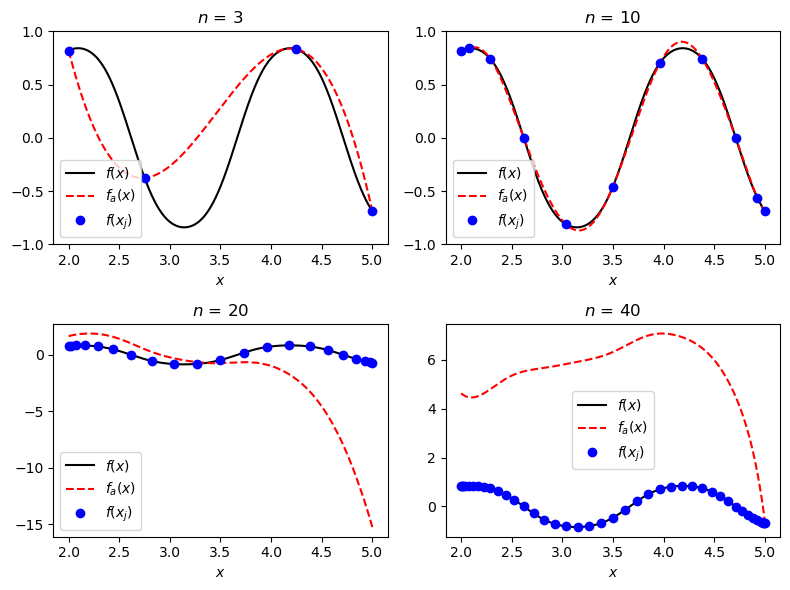

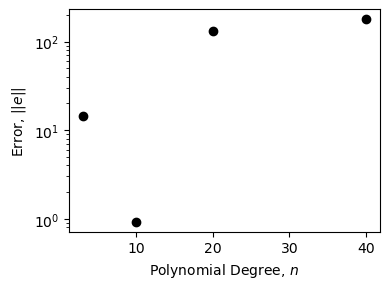

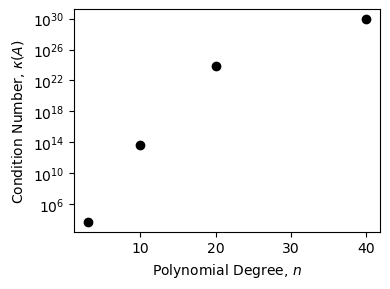

In [27]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
plt.style.use('default')

# define a, b, n values and x_test points
a, b = 2, 5
n_list = [3, 10, 20, 40]
x_test = np.linspace(a, b, 1000)

# initialize lists for saving data
x_interpolate_list = []
f_interpolate_list = []
fa_list = []
f_list = []
err_list = []
condition_list = []

# get data for each degree n
for n in n_list:
    # get interpolation points (Chebyshev)
    x_interpolate = chebyshev(a, b, n + 1)

    # get true function values for interpolation points (for plotting)
    f_interpolate = [f_true(x) for x in x_interpolate]

    # get monomial solution
    c, A, condition = solve_monomial(a, b, n)

    # get monomial approximation for x_test
    fa, f, err = approximate_monomial(c, x_test)

    # save data to lists
    x_interpolate_list.append(x_interpolate)
    f_interpolate_list.append(f_interpolate)
    fa_list.append(fa)
    f_list.append(f)
    err_list.append(err)
    condition_list.append(condition)

# plot interpolated and true functions
fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(x_test, f_list[0], 'k-', label='$f(x)$')
ax1.plot(x_test, fa_list[0], 'r--', label='$f_a(x)$')
ax1.plot(x_interpolate_list[0], f_interpolate_list[0], 'bo', label='$f(x_j)$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('')
ax1.set_ylim(-1, 1)
ax1.set_title('$n$ = 3')
ax1.legend()

ax2 = fig.add_subplot(222)
ax2.plot(x_test, f_list[1], 'k-', label='$f(x)$')
ax2.plot(x_test, fa_list[1], 'r--', label='$f_a(x)$')
ax2.plot(x_interpolate_list[1], f_interpolate_list[1], 'bo', label='$f(x_j)$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('')
ax2.set_ylim(-1, 1)
ax2.set_title('$n$ = 10')
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.plot(x_test, f_list[2], 'k-', label='$f(x)$')
ax3.plot(x_test, fa_list[2], 'r--', label='$f_a(x)$')
ax3.plot(x_interpolate_list[2], f_interpolate_list[2], 'bo', label='$f(x_j)$')
ax3.set_xlabel('$x$')
ax3.set_ylabel('')
ax3.set_title('$n$ = 20')
ax3.legend()

ax3 = fig.add_subplot(224)
ax3.plot(x_test, f_list[3], 'k-', label='$f(x)$')
ax3.plot(x_test, fa_list[3], 'r--', label='$f_a(x)$')
ax3.plot(x_interpolate_list[3], f_interpolate_list[3], 'bo', label='$f(x_j)$')
ax3.set_xlabel('$x$')
ax3.set_ylabel('')
ax3.set_title('$n$ = 40')
ax3.legend()
# fig.savefig('solution-figures/part1e-functions.png')

# plot error vs. n
fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)
ax.plot(n_list, err_list, 'ko')
ax.set_xlabel('Polynomial Degree, $n$')
ax.set_ylabel('Error, $||e||$')
ax.set_yscale('log')
# fig.savefig('solution-figures/part1e-error.png')

# plot condition number vs. n
fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)
ax.plot(n_list, condition_list, 'ko')
ax.set_xlabel('Polynomial Degree, $n$')
ax.set_ylabel('Condition Number, $\kappa(A)$')
ax.set_yscale('log')
# fig.savefig('solution-figures/part1e-condition.png')

# Problem 2: Is the Lagrange basis really better than the monomial basis for polynomial interpolation?

We discussed in class that the Lagrange basis is vastly superior to the monomial basis. You will demonstrate that for yourself in this problem.

Use the Chebyshev points described in class.

## Part 2a: Lagrange basis (concept question)

You will be asked to interpolate $f(x)$ using a polynomial of degree $n$ with a **Lagrange basis**. Before coding your solution, answer the following concept questions in the next Markdown cell.

1. Write out the set of Lagrange basis vectors, $\mathcal{B} = \{b_0(x), b_1(x), \dots, b_{n}(x) \}$, for your polynomial approximation function with $n = 3$.
1. Symbolically derive the matrix system $\boldsymbol{Ac} = \boldsymbol{f}$ for using this basis (with $n = 3$). I.e., show the complete matrix equation.

YOUR ANSWER HERE

First, the formula for a Lagrange basis vector.

$\mathcal{L}_i(x) = \frac{\Pi_{j = 0}^n(x-x_j), i \neq j}{\Pi_{j = 0}^n(x_i - x_j), i \neq j}$

Expanded when $n = 3$ and $i = 0$:

$\mathcal{L}_0(x) = \frac{\Pi_{j = 0}^3(x-x_j), j \neq 0}{\Pi_{j = 0}^3(x_0 - x_j), j \neq 0} = \frac{(x - x_1)(x - x_2)(x - x_3)}{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)}$

A property becomes obvious:

$\mathcal{L}_i(x_j) = \begin{cases} 
      1 & j = i \\
      0 & else
   \end{cases}$

Now for the basis and matrices:

$\mathcal{B} = \{ \mathcal{L}_0(x), \mathcal{L}_1(x), \mathcal{L}_2(x), \mathcal{L}_3(x) \}$

$
\begin{bmatrix}
    \mathcal{L}_0(x_0) & \mathcal{L}_1(x_0) & \mathcal{L}_2(x_0) & \mathcal{L}_3(x_0) \\
    \mathcal{L}_0(x_1) & \mathcal{L}_1(x_1) & \mathcal{L}_2(x_1) & \mathcal{L}_3(x_1) \\
    \mathcal{L}_0(x_2) & \mathcal{L}_1(x_2) & \mathcal{L}_2(x_2) & \mathcal{L}_3(x_2) \\
    \mathcal{L}_0(x_3) & \mathcal{L}_1(x_3) & \mathcal{L}_2(x_3) & \mathcal{L}_3(x_3) \\
\end{bmatrix}
\begin{bmatrix}
    c_0 \\
    c_1 \\
    c_2 \\
    c_3 \\
\end{bmatrix}
=
\begin{bmatrix}
    f(x_0) \\
    f(x_1) \\
    f(x_2) \\
    f(x_3) \\
\end{bmatrix}
$

By the property we found.

$
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    c_0 \\
    c_1 \\
    c_2 \\
    c_3 \\
\end{bmatrix}
=
\begin{bmatrix}
    f(x_0) \\
    f(x_1) \\
    f(x_2) \\
    f(x_3) \\
\end{bmatrix}
$

## Part 2b: Lagrange solution and approximation

Complete a function to return:
- the $\boldsymbol{c}$ vector of coefficients for polynomomial interpolation of degree $n$ in the domain $[a, b]$ with a **Lagrange basis**,
- the $\boldsymbol{A}$ matrix,
- the condition number of the $\boldsymbol{A}$ matrix,
- the interpolation points used.

Complete a function to return:
- the approximated $f_a(x)$ values for all $x \in \boldsymbol{x_{test}}$, where $f_a(x)$ is a polynomomial interpolation in the domain $[a, b]$ with a **Lagrange basis**,
- the true $f(x)$ values for all $x \in \boldsymbol{x_{test}}$,
- the approximation error $|| \boldsymbol{e} ||$ for $\boldsymbol{x_{test}}$.

Calculate the error as $|| \boldsymbol{e} || = \sqrt{\boldsymbol{e}^T \boldsymbol{e}}$, where $\boldsymbol{e} = f(\boldsymbol{x_{test}}) - f_a(\boldsymbol{x_{test}})$.

In [28]:
# don't forget to import any Python libraries required for your function...

def solve_lagrange(a, b, n):
    """Returns the solution to polynomial interpolation of degree n in the domain [a, b] with a Lagrange basis.

    This function assumes an f_true(x) function is globally available for calculating the true function value at x.
    
    Parameters
    ----------
    a : float_like
        Lower bound of domain (inclusive)
    b : float_like
        Upper bound of domain (inclusive)
    n : integer
        Polynomial degree
        
    Returns
    -------
    c : array_like
        c vector of coefficients for polynomial interpolation satisfying Ac = f
    A : array_like
        A matrix for polynomial interpolation satisfying Ac = f
    condition : float_like
        Condition number for the A matrix
    x_interpolate : array_like
        List of interpolation points (i.e., x-values) used
    
    """
    
    ### YOUR CODE HERE ###
    # get interpolation points (Chebyshev)
    x_interpolate = chebyshev(a, b, n+1)
    f = [f_true(x) for x in x_interpolate]
    c = f
    A = np.identity(n+1)

    # build A matrix
    
    # get f (vector of true function values for interpolation points)
    
    # solve matrix system
    
    # get cond(A)
    return c, A, np.linalg.cond(A), x_interpolate
    

def approximate_lagrange(c, x_interpolate, x_test):
    """Returns the interpolation error for a polynomial with a Lagrange basis.

    This function assumes an f_true(x) function is globally available for calculating the true function value at x.
    
    Parameters
    ----------
    c : array_like
        c vector for polynomial interpolation satisfying Ac = f
    x_interpolate : array_like
        List of interpolation points (i.e., x-values) used
    x_test : array_like
        List of inputs to evaluate the approximated function over
        
    Returns
    -------
    fa : array_like
        Vector of approximated function values for each x in x_test
    f : array_like
        Vector of true function
    err : float_like
        Error calculated as a 2-norm using x_test
    
    """
    
    ### YOUR CODE HERE ###
    # get fa (vector of approximated function values for x_test)
    fa = np.zeros_like(x_test)
    for i in range(len(x_test)):
        for j in range(len(c)):
            L_j = c[j]
            for k in range(len(x_interpolate)):
                if (k == j): continue
                L_j = L_j * (x_test[i] - x_interpolate[k]) / (x_interpolate[j] - x_interpolate[k])
            fa[i] = fa[i] + L_j
    
    # get f (vector of true function values for x_test)
    f = [f_true(x) for x in x_test]
    # get e (error vector)
    e = f - fa

    # calculate error (2-norm)
    return fa, f, np.linalg.norm(e)
    

In [29]:
"""Check the solve_lagrange function"""
a, b, n = 2, 5, 3
c, A, condition, x_interpolate = solve_lagrange(a, b, n)

# check output
c_sol = np.array([-0.6886951995658905, 0.8322686285099006, -0.37625221889548544, 0.819289219220601])
A_sol = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
cond_sol = 1
x_sol = [5, 4.25, 2.75, 2]
print('c solution: ', c_sol)
print('A solution: ', A_sol)
print('Condition(A) solution: ', cond_sol)
print('Interpolation points solution: ', x_sol)
print('c output: ', c)
print('A output: ', A)
print('Condition(A) output: ', condition)
print('Interpolation points output: ', x_interpolate)
np.testing.assert_allclose(c, c_sol)
np.testing.assert_allclose(A, A_sol)
np.testing.assert_almost_equal(condition, cond_sol)
np.testing.assert_allclose(x_interpolate, x_sol)
print('TESTS PASSED')

c solution:  [-0.6886952   0.83226863 -0.37625222  0.81928922]
A solution:  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Condition(A) solution:  1
Interpolation points solution:  [5, 4.25, 2.75, 2]
c output:  [-0.6886951995658906, 0.8322686285099006, -0.3762522188954855, 0.819289219220601]
A output:  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Condition(A) output:  1.0
Interpolation points output:  [5.0, 4.25, 2.7500000000000004, 2.0]
TESTS PASSED


In [30]:
"""Check the approximate_lagrange function"""
a, b, n = 2, 5, 3
c = [0.819289219220601, -0.37625221889548544, 0.8322686285099006, -0.6886951995658905]
x_interpolate = [2, 2.75, 4.25, 5]
x_test = np.linspace(a, b, 7)
fa, f, err = approximate_lagrange(c, x_interpolate, x_test)

# check output
fa_sol = [0.819289219220601, -0.28065695641855654, -0.2658431561710738, 0.2822452698004917, 0.7821229713335826, 0.652304598265641, -0.6886951995658905]
f_sol = [0.81928922, 0.33973518, -0.79019693, -0.45781587, 0.74720996, 0.56044305, -0.6886952]
err_sol = 1.1032593680772769
print('fa solution: ', fa_sol)
print('f solution: ', f_sol)
print('err solution: ', err_sol)
print('fa output: ', fa)
print('f output: ', f)
print('err output: ', err)
np.testing.assert_allclose(fa, fa_sol)
np.testing.assert_allclose(f, f_sol)
np.testing.assert_almost_equal(err, err_sol)
print('TESTS PASSED')
print(' ')

fa solution:  [0.819289219220601, -0.28065695641855654, -0.2658431561710738, 0.2822452698004917, 0.7821229713335826, 0.652304598265641, -0.6886951995658905]
f solution:  [0.81928922, 0.33973518, -0.79019693, -0.45781587, 0.74720996, 0.56044305, -0.6886952]
err solution:  1.1032593680772769
fa output:  [ 0.81928922 -0.28065696 -0.26584316  0.28224527  0.78212297  0.6523046
 -0.6886952 ]
f output:  [0.819289219220601, 0.339735181820044, -0.7901969286775086, -0.45781586739145336, 0.7472099577047095, 0.5604430501739893, -0.6886951995658906]
err output:  1.1032593680772769
TESTS PASSED
 


## Part 2c: Lagrange vs. monomial experiment

Write code to create the following (separate) plots:
1. plot the approximated and true function for polynomial degrees $n = 3, 10, 20, 40$ (make a subplot with one subplot for each $n$),
1. plot the approximation error as a function of polynomial degree for $n = 3, 10, 20, 40$ **for the monomial AND Lagrange bases**,
1. plot the condition number for $\boldsymbol{A}$ as a function of polynomial degree for $n = 3, 10, 20, 40$ **for the monomial AND Lagrange bases**.

Define $x_{test}$ as 1000 equally spaced points in the domain.

Hints:
- Use matplotlib's `tight_layout()` function to help with subplot axes arrangement. E.g., create your figure using `fig = plt.figure(figsize=(6, 4), tight_layout=True)`.

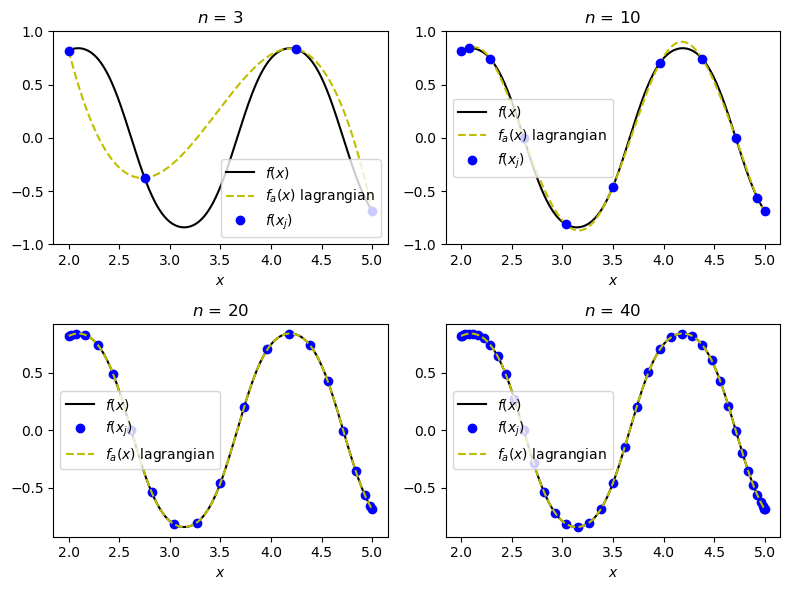

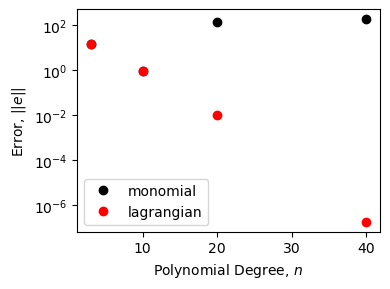

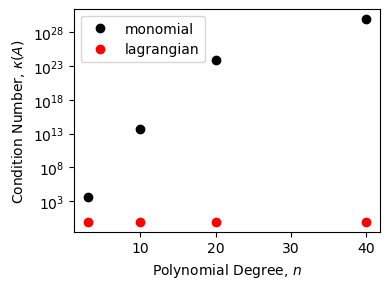

In [31]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
plt.style.use('default')

# define a, b, n values and x_test points
a, b = 2, 5
n_list = [3, 10, 20, 40]
x_test = np.linspace(a, b, 1000)

# initialize lists for saving data

x_interpolate_list = []
f_interpolate_list = []
fa_M_list = []
fa_L_list = []
f_list = []
err_M_list = []
err_L_list = []
condition_M_list = []
condition_L_list = []

for n in n_list:
    # get interpolation points (Chebyshev)
    x_interpolate = chebyshev(a, b, n + 1)
    
    # get true function values for interpolation points (for plotting)
    f_interpolate = [f_true(x) for x in x_interpolate]
    
    # get monomial and Lagrange solutions
    c_M, A_M, condition_M = solve_monomial(a, b, n)
    c_L, A_L, condition_L, g = solve_lagrange(a, b, n)
    
    # get monomial and Lagrange approximations for x_test
    fa_M, f_M, err_M = approximate_monomial(c_M, x_test)
    fa_L, f_L, err_L = approximate_lagrange(c_L, x_interpolate, x_test)
    
    
    # save data to lists
    x_interpolate_list.append(x_interpolate)
    f_interpolate_list.append(f_interpolate)
    f_list.append(f_M)
    fa_M_list.append(fa_M)
    err_M_list.append(err_M)
    condition_M_list.append(condition_M)
    fa_L_list.append(fa_L)
    err_L_list.append(err_L)
    condition_L_list.append(condition_L)
    
# plot interpolated and true functions (Lagrange)
fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(x_test, f_list[0], 'k-', label='$f(x)$')
# ax1.plot(x_test, fa_M_list[0], 'r--', label='$f_a(x)$ monomial')
ax1.plot(x_test, fa_L_list[0], 'y--', label='$f_a(x)$ lagrangian')
ax1.plot(x_interpolate_list[0], f_interpolate_list[0], 'bo', label='$f(x_j)$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('')
ax1.set_ylim(-1, 1)
ax1.set_title('$n$ = 3')
ax1.legend()

ax2 = fig.add_subplot(222)
ax2.plot(x_test, f_list[1], 'k-', label='$f(x)$')
# ax2.plot(x_test, fa_M_list[1], 'r--', label='$f_a(x)$ monomial')
ax2.plot(x_test, fa_L_list[1], 'y--', label='$f_a(x)$ lagrangian')
ax2.plot(x_interpolate_list[1], f_interpolate_list[1], 'bo', label='$f(x_j)$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('')
ax2.set_ylim(-1, 1)
ax2.set_title('$n$ = 10')
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.plot(x_test, f_list[2], 'k-', label='$f(x)$')
ax3.plot(x_interpolate_list[2], f_interpolate_list[2], 'bo', label='$f(x_j)$')
# ax3.plot(x_test, fa_M_list[2], 'r--', label='$f_a(x)$ monomial')
ax3.plot(x_test, fa_L_list[2], 'y--', label='$f_a(x)$ lagrangian')
ax3.set_xlabel('$x$')
ax3.set_ylabel('')
ax3.set_title('$n$ = 20')
ax3.legend()

ax3 = fig.add_subplot(224)
ax3.plot(x_test, f_list[3], 'k-', label='$f(x)$')
ax3.plot(x_interpolate_list[3], f_interpolate_list[3], 'bo', label='$f(x_j)$')
# ax3.plot(x_test, fa_M_list[3], 'r--', label='$f_a(x)$ monomial')
ax3.plot(x_test, fa_L_list[3], 'y--', label='$f_a(x)$ lagrangian')
ax3.set_xlabel('$x$')
ax3.set_ylabel('')
ax3.set_title('$n$ = 40')
ax3.legend()

# plot error vs. n

fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)
ax.plot(n_list, err_M_list, 'ko', label='monomial')
ax.plot(n_list, err_L_list, 'ro', label='lagrangian')
ax.set_xlabel('Polynomial Degree, $n$')
ax.set_ylabel('Error, $||e||$')
ax.set_yscale('log')
ax.legend()

# plot condition number vs. n

fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)
ax.plot(n_list, condition_M_list, 'ko', label='monomial')
ax.plot(n_list, condition_L_list, 'ro', label='lagrangian')
ax.set_xlabel('Polynomial Degree, $n$')
ax.set_ylabel('Condition Number, $\kappa(A)$')
ax.set_yscale('log')
ax.legend()

## Part 2d: Discussion (concept question)

Discuss the following in the Markdown cell below.
1. Use the plots from Part 2c to argue why the Lagrange basis is betted suited to polynomial interpolation than the monomial basis.
1. Why does the monomial basis still give large errors even when using Chebyshev points?

1. The Lagrange basis and the monomial basis largely get the same results at lower $n$, where $n$ is the number of interpolation points chosen. The norm of their error vectors are nearly the same at $n = 3$ and $n = 10$, as seen in the error subplot. At higher $n$, the monomial basis results start to diverge more and more from the actual function while the Lagrange basis converges until the error is nearly 0 and the approximation nearly overlaps the true function, as seen in the graphs for $n=40$ and error. Thus, while their accuracy was similar at lower $n$, at higher $n$, Lagrangian methods were more effective, nearly replicating the function as seen in subplots for $n = 20$ and $n = 40$, while monomial methods diverged drastically and didn't resemble the original function at all as we saw in the plots for problem 1.
2. As we saw in class, the Lagrangian basis has a lot of variation between its basis vectors. This allows for lots of different bahavior to be replicated, as different vectors will be emphasized more depending on the behavior. The monomial basis, on the other hand, demonstrates the same behavior for its vectors, especially at the higher order terms. The value increases or decreases rapidly as x moves away from 0. Thus, even when using the improved Chebyshev points, approximating the function is hard because the basis can only replicate certain specific behavior in a function. Since Chebyshev points emphasize points at the ends of the given boundaries, this could be an even bigger problem, as one of these endpoints will likely be the farthest from 0 within the boundaries, meaning the monomial approximation will have to fit the extreme behavior to the function. The less extreme behavior closer to 0 may be overcorrected, making these sections inaccurate.

# Problem 3: The importance of point distribution in polynomial interpolation

Runge's problem is a famous case of when polynomial interpolation can go dramatically wrong. In fact, it is one of the primary reasons why many experts believe that polynomial interpolation is doomed to fail, when this is in fact **not true** provided that one uses the right set of interpolation points!

We will investigate behavior of polynomial interpolants on Runge's problem now: consider interpolating $f(x) = \frac{1}{1+x^2}$ over the interval $-5\le x\le 5$.

Hint:
- You may want to redefine the `f_true()` function to be $f(x) = \frac{1}{1+x^2}$ for this problem. Just make sure you re-run the original `f_true()` function to set $f(x) = \sin(\cos(3x))$ if you re-run code for Problems 1 and 2 after running code for this problem. You can also modify the Lagrange functions created earlier to have an input argument specifying which $f(x)$ to assume.

In [32]:
def f_true(x):
    return 1 / (1 + x**2)

## Part 3a: Interpolation using equally spaced points

Write code to interpolate $f(x)$ using equally spaced points with the Lagrange basis for polynomials of degree $n$.

In [33]:
def solve_lagrange_equispaced(a, b, n):
    """Returns the solution to polynomial interpolation of degree n in the domain [a, b] with a Lagrange basis using equispaced points.

    This function assumes an f_true(x) function is globally available for calculating the true function value at x.
    
    Parameters
    ----------
    a : float_like
        Lower bound of domain (inclusive)
    b : float_like
        Upper bound of domain (inclusive)
    n : integer
        Polynomial degree
        
    Returns
    -------
    c : array_like
        c vector of coefficients for polynomial interpolation satisfying Ac = f
    A : array_like
        A matrix for polynomial interpolation satisfying Ac = f
    condition : float_like
        Condition number for the A matrix
    x_interpolate : array_like
        List of interpolation points (i.e., x-values) used
    
    """
    
    ### YOUR CODE HERE ###
    # get interpolation points

    # build A matrix
    
    # get f (vector of true function values for interpolation points)
    
    # solve matrix system
    
    # get cond(A)
    x_interpolate = np.linspace(a,b,n+1)
    f = [f_true(x) for x in x_interpolate]
    c = f
    A = np.identity(n+1)

    # build A matrix
    
    # get f (vector of true function values for interpolation points)
    
    # solve matrix system
    
    # get cond(A)
    return c, A, np.linalg.cond(A), x_interpolate
    

## Part 3b: Equally spaced vs. Chebyshev points experiment 

Write code to create the following (separate) plots:
1. plot the approximated and true function for polynomial interpolation using the Lagrange basis with degrees $n = 5, 10, 20$ (make a subplot with one subplot for each $n$) **when using equally spaced points AND Chebyshev points**,
1. plot the approximation error as a function of polynomial degree for $n = 5, 10, 20$ **when using equally spaced AND Chebyshev points**.

Define $x_{test}$ as 1000 equally spaced points in the domain.

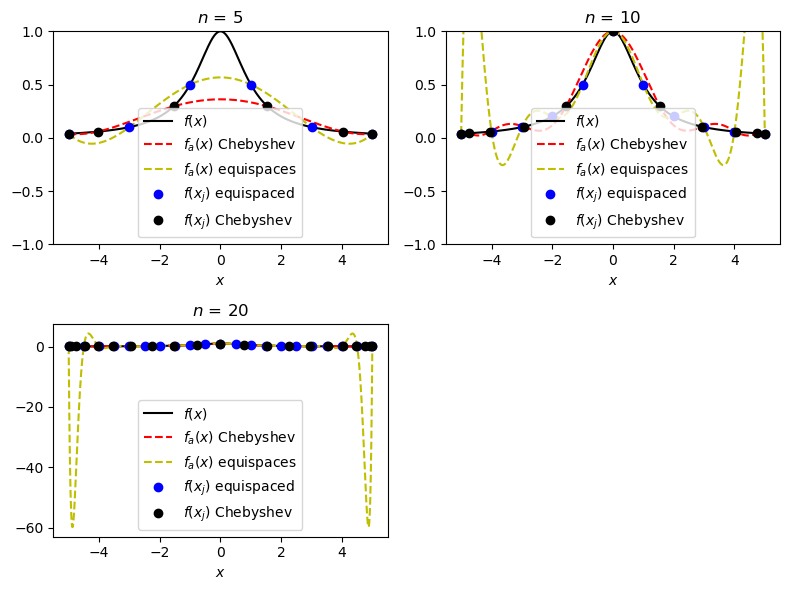

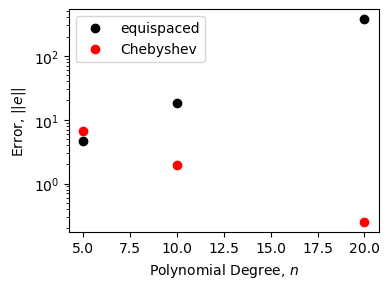

In [34]:
### YOUR CODE HERE ###

# redefine f_true

# define a, b, n values and x_test points
a = -5
b = 5
n_list = [5, 10, 20]
x_test = np.linspace(a, b, 1000)

# initialize lists for saving data
x_interpolate_list_E = []
x_interpolate_list_C = []
f_interpolate_list_E = []
f_interpolate_list_C = []
fa_E_list = []
fa_C_list = []
f_list = []
err_E_list = []
err_C_list = []
condition_E_list = []
condition_C_list = []

# get data for each degree n
for n in n_list:
    # get equal and Chebyshev solutions
    x_interpolate_C = chebyshev(a, b, n + 1)
    x_interpolate_E = np.linspace(a, b, n + 1)
    f_interpolate_C = [f_true(x) for x in x_interpolate_C]
    f_interpolate_E = [f_true(x) for x in x_interpolate_E]

    c_C, A_C, condition_C, g = solve_lagrange(a, b, n)
    c_E, A_E, condition_E, g = solve_lagrange_equispaced(a, b, n)

    fa_C, f_C, err_C = approximate_lagrange(c_C, x_interpolate_C, x_test)
    fa_E, f_E, err_E = approximate_lagrange(c_E, x_interpolate_E, x_test)   

    x_interpolate_list_E.append(x_interpolate_E)
    x_interpolate_list_C.append(x_interpolate_C)
    f_interpolate_list_E.append(f_interpolate_E)
    f_interpolate_list_C.append(f_interpolate_C)
    f_list.append(f_C)
    fa_C_list.append(fa_C)
    err_C_list.append(err_C)
    condition_C_list.append(condition_C)
    fa_E_list.append(fa_E)
    err_E_list.append(err_E)
    condition_E_list.append(condition_E)    
    

# plot interpolated and true functions

fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(x_test, f_list[0], 'k-', label='$f(x)$')
ax1.plot(x_test, fa_C_list[0], 'r--', label='$f_a(x)$ Chebyshev')
ax1.plot(x_test, fa_E_list[0], 'y--', label='$f_a(x)$ equispaces')
ax1.plot(x_interpolate_list_E[0], f_interpolate_list_E[0], 'bo', label='$f(x_j)$ equispaced')
ax1.plot(x_interpolate_list_C[0], f_interpolate_list_C[0], 'ko', label='$f(x_j)$ Chebyshev')
ax1.set_xlabel('$x$')
ax1.set_ylabel('')
ax1.set_ylim(-1, 1)
ax1.set_title('$n$ = 5')
ax1.legend()

ax2 = fig.add_subplot(222)
ax2.plot(x_test, f_list[1], 'k-', label='$f(x)$')
ax2.plot(x_test, fa_C_list[1], 'r--', label='$f_a(x)$ Chebyshev')
ax2.plot(x_test, fa_E_list[1], 'y--', label='$f_a(x)$ equispaces')
ax2.plot(x_interpolate_list_E[1], f_interpolate_list_E[1], 'bo', label='$f(x_j)$ equispaced')
ax2.plot(x_interpolate_list_C[1], f_interpolate_list_C[1], 'ko', label='$f(x_j)$ Chebyshev')
ax2.set_xlabel('$x$')
ax2.set_ylabel('')
ax2.set_ylim(-1, 1)
ax2.set_title('$n$ = 10')
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.plot(x_test, f_list[2], 'k-', label='$f(x)$')
ax3.plot(x_test, fa_C_list[2], 'r--', label='$f_a(x)$ Chebyshev')
ax3.plot(x_test, fa_E_list[2], 'y--', label='$f_a(x)$ equispaces')
ax3.plot(x_interpolate_list_E[2], f_interpolate_list_E[2], 'bo', label='$f(x_j)$ equispaced')
ax3.plot(x_interpolate_list_C[2], f_interpolate_list_C[2], 'ko', label='$f(x_j)$ Chebyshev')
ax3.set_xlabel('$x$')
ax3.set_ylabel('')
ax3.set_title('$n$ = 20')
ax3.legend()

fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)
ax.plot(n_list, err_E_list, 'ko', label='equispaced')
ax.plot(n_list, err_C_list, 'ro', label='Chebyshev')
ax.set_xlabel('Polynomial Degree, $n$')
ax.set_ylabel('Error, $||e||$')
ax.set_yscale('log')
ax.legend()